In [2]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [4]:
labels = ['lifestyle', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_data('Sample Images Downloaded/Train')
val = get_data('Sample Images Downloaded/Test')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

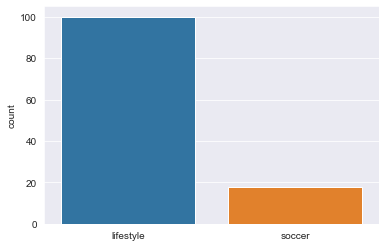

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("lifestyle")
    else:
        l.append("soccer")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'lifestyle')

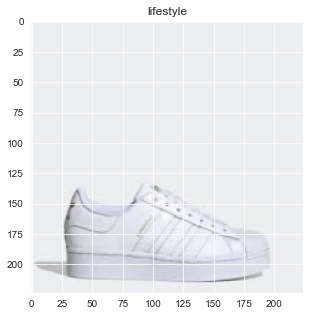

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'soccer')

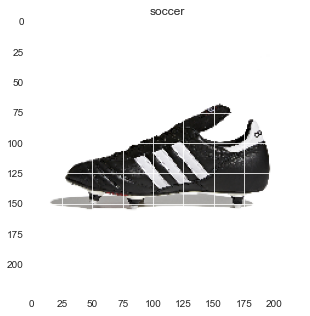

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [61]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = tf.keras.Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

2021-09-26 13:34:16.621680: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

2021-09-26 13:35:02.323877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1/500
4/4 [==============================] - 3s 520ms/step - loss: 0.9568 - accuracy: 0.1610 - val_loss: 0.7907 - val_accuracy: 0.2424
Epoch 2/500
4/4 [==============================] - 2s 447ms/step - loss: 0.8978 - accuracy: 0.1610 - val_loss: 0.7327 - val_accuracy: 0.1818
Epoch 3/500
4/4 [==============================] - 2s 447ms/step - loss: 0.7877 - accuracy: 0.2542 - val_loss: 0.6853 - val_accuracy: 0.6667
Epoch 4/500
4/4 [==============================] - 2s 450ms/step - loss: 0.7369 - accuracy: 0.3983 - val_loss: 0.6476 - val_accuracy: 0.8182
Epoch 5/500
4/4 [==============================] - 2s 461ms/step - loss: 0.6836 - accuracy: 0.5763 - val_loss: 0.6177 - val_accuracy: 0.7576
Epoch 6/500
4/4 [==============================] - 2s 458ms/step - loss: 0.6209 - accuracy: 0.7288 - val_loss: 0.5938 - val_accuracy: 0.7576
Epoch 7/500
4/4 [==============================] - 2s 471ms/step - loss: 0.6015 - accuracy: 0.7881 - val_loss: 0.5756 - val_accuracy: 0.7576
Epoch 8/500
4

Epoch 59/500
4/4 [==============================] - 3s 711ms/step - loss: 0.4456 - accuracy: 0.8475 - val_loss: 0.5399 - val_accuracy: 0.7576
Epoch 60/500
4/4 [==============================] - 2s 620ms/step - loss: 0.4430 - accuracy: 0.8475 - val_loss: 0.5395 - val_accuracy: 0.7576
Epoch 61/500
4/4 [==============================] - 2s 568ms/step - loss: 0.4259 - accuracy: 0.8475 - val_loss: 0.5398 - val_accuracy: 0.7576
Epoch 62/500
4/4 [==============================] - 2s 592ms/step - loss: 0.4311 - accuracy: 0.8475 - val_loss: 0.5400 - val_accuracy: 0.7576
Epoch 63/500
4/4 [==============================] - 2s 543ms/step - loss: 0.4374 - accuracy: 0.8475 - val_loss: 0.5403 - val_accuracy: 0.7576
Epoch 64/500
4/4 [==============================] - 2s 492ms/step - loss: 0.4251 - accuracy: 0.8475 - val_loss: 0.5405 - val_accuracy: 0.7576
Epoch 65/500
4/4 [==============================] - 2s 483ms/step - loss: 0.4449 - accuracy: 0.8475 - val_loss: 0.5399 - val_accuracy: 0.7576
Epoch 

4/4 [==============================] - 2s 482ms/step - loss: 0.4098 - accuracy: 0.8475 - val_loss: 0.5103 - val_accuracy: 0.7576
Epoch 117/500
4/4 [==============================] - 2s 477ms/step - loss: 0.4211 - accuracy: 0.8475 - val_loss: 0.5096 - val_accuracy: 0.7576
Epoch 118/500
4/4 [==============================] - 2s 497ms/step - loss: 0.4135 - accuracy: 0.8475 - val_loss: 0.5098 - val_accuracy: 0.7576
Epoch 119/500
4/4 [==============================] - 2s 515ms/step - loss: 0.4007 - accuracy: 0.8475 - val_loss: 0.5084 - val_accuracy: 0.7576
Epoch 120/500
4/4 [==============================] - 2s 510ms/step - loss: 0.4124 - accuracy: 0.8475 - val_loss: 0.5082 - val_accuracy: 0.7576
Epoch 121/500
4/4 [==============================] - 2s 537ms/step - loss: 0.4091 - accuracy: 0.8475 - val_loss: 0.5077 - val_accuracy: 0.7576
Epoch 122/500
4/4 [==============================] - 2s 519ms/step - loss: 0.3763 - accuracy: 0.8475 - val_loss: 0.5084 - val_accuracy: 0.7576
Epoch 123/500

4/4 [==============================] - 2s 473ms/step - loss: 0.3740 - accuracy: 0.8475 - val_loss: 0.4834 - val_accuracy: 0.7576
Epoch 174/500
4/4 [==============================] - 2s 483ms/step - loss: 0.3641 - accuracy: 0.8475 - val_loss: 0.4837 - val_accuracy: 0.7576
Epoch 175/500
4/4 [==============================] - 2s 475ms/step - loss: 0.3523 - accuracy: 0.8475 - val_loss: 0.4825 - val_accuracy: 0.7576
Epoch 176/500
4/4 [==============================] - 2s 486ms/step - loss: 0.3629 - accuracy: 0.8475 - val_loss: 0.4823 - val_accuracy: 0.7576
Epoch 177/500
4/4 [==============================] - 2s 463ms/step - loss: 0.3525 - accuracy: 0.8475 - val_loss: 0.4836 - val_accuracy: 0.7576
Epoch 178/500
4/4 [==============================] - 2s 461ms/step - loss: 0.3517 - accuracy: 0.8475 - val_loss: 0.4834 - val_accuracy: 0.7576
Epoch 179/500
4/4 [==============================] - 2s 464ms/step - loss: 0.3572 - accuracy: 0.8475 - val_loss: 0.4816 - val_accuracy: 0.7576
Epoch 180/500

4/4 [==============================] - 2s 473ms/step - loss: 0.2927 - accuracy: 0.8475 - val_loss: 0.4564 - val_accuracy: 0.7576
Epoch 231/500
4/4 [==============================] - 2s 474ms/step - loss: 0.3099 - accuracy: 0.8559 - val_loss: 0.4588 - val_accuracy: 0.7576
Epoch 232/500
4/4 [==============================] - 2s 468ms/step - loss: 0.2991 - accuracy: 0.8644 - val_loss: 0.4604 - val_accuracy: 0.7576
Epoch 233/500
4/4 [==============================] - 2s 486ms/step - loss: 0.3182 - accuracy: 0.8475 - val_loss: 0.4595 - val_accuracy: 0.7576
Epoch 234/500
4/4 [==============================] - 2s 466ms/step - loss: 0.3235 - accuracy: 0.8475 - val_loss: 0.4601 - val_accuracy: 0.7576
Epoch 235/500
4/4 [==============================] - 2s 470ms/step - loss: 0.3117 - accuracy: 0.8559 - val_loss: 0.4597 - val_accuracy: 0.7576
Epoch 236/500
4/4 [==============================] - 2s 525ms/step - loss: 0.3120 - accuracy: 0.8559 - val_loss: 0.4584 - val_accuracy: 0.7576
Epoch 237/500

4/4 [==============================] - 2s 497ms/step - loss: 0.2597 - accuracy: 0.8814 - val_loss: 0.4522 - val_accuracy: 0.7576
Epoch 288/500
4/4 [==============================] - 2s 516ms/step - loss: 0.2688 - accuracy: 0.8559 - val_loss: 0.4517 - val_accuracy: 0.7576
Epoch 289/500
4/4 [==============================] - 2s 491ms/step - loss: 0.2682 - accuracy: 0.8644 - val_loss: 0.4508 - val_accuracy: 0.7576
Epoch 290/500
4/4 [==============================] - 2s 483ms/step - loss: 0.2564 - accuracy: 0.8644 - val_loss: 0.4486 - val_accuracy: 0.7576
Epoch 291/500
4/4 [==============================] - 2s 494ms/step - loss: 0.2635 - accuracy: 0.8814 - val_loss: 0.4480 - val_accuracy: 0.7576
Epoch 292/500
4/4 [==============================] - 2s 485ms/step - loss: 0.2637 - accuracy: 0.8814 - val_loss: 0.4464 - val_accuracy: 0.7576
Epoch 293/500
4/4 [==============================] - 2s 498ms/step - loss: 0.2587 - accuracy: 0.8814 - val_loss: 0.4468 - val_accuracy: 0.7576
Epoch 294/500

4/4 [==============================] - 2s 584ms/step - loss: 0.2168 - accuracy: 0.9068 - val_loss: 0.4501 - val_accuracy: 0.7576
Epoch 345/500
4/4 [==============================] - 2s 586ms/step - loss: 0.2270 - accuracy: 0.8898 - val_loss: 0.4502 - val_accuracy: 0.7576
Epoch 346/500
4/4 [==============================] - 2s 572ms/step - loss: 0.2179 - accuracy: 0.8898 - val_loss: 0.4504 - val_accuracy: 0.7576
Epoch 347/500
4/4 [==============================] - 2s 579ms/step - loss: 0.2132 - accuracy: 0.9153 - val_loss: 0.4497 - val_accuracy: 0.7576
Epoch 348/500
4/4 [==============================] - 2s 591ms/step - loss: 0.2159 - accuracy: 0.9068 - val_loss: 0.4483 - val_accuracy: 0.7576
Epoch 349/500
4/4 [==============================] - 2s 514ms/step - loss: 0.2211 - accuracy: 0.9068 - val_loss: 0.4470 - val_accuracy: 0.7576
Epoch 350/500
4/4 [==============================] - 2s 496ms/step - loss: 0.2117 - accuracy: 0.9153 - val_loss: 0.4477 - val_accuracy: 0.7576
Epoch 351/500

4/4 [==============================] - 2s 498ms/step - loss: 0.1909 - accuracy: 0.9153 - val_loss: 0.4526 - val_accuracy: 0.7576
Epoch 402/500
4/4 [==============================] - 2s 483ms/step - loss: 0.1863 - accuracy: 0.9492 - val_loss: 0.4486 - val_accuracy: 0.7576
Epoch 403/500
4/4 [==============================] - 2s 494ms/step - loss: 0.1696 - accuracy: 0.9661 - val_loss: 0.4471 - val_accuracy: 0.7576
Epoch 404/500
4/4 [==============================] - 2s 478ms/step - loss: 0.1636 - accuracy: 0.9322 - val_loss: 0.4447 - val_accuracy: 0.7576
Epoch 405/500
4/4 [==============================] - 2s 481ms/step - loss: 0.1814 - accuracy: 0.9576 - val_loss: 0.4431 - val_accuracy: 0.7576
Epoch 406/500
4/4 [==============================] - 2s 485ms/step - loss: 0.1866 - accuracy: 0.9322 - val_loss: 0.4437 - val_accuracy: 0.7576
Epoch 407/500
4/4 [==============================] - 2s 491ms/step - loss: 0.1659 - accuracy: 0.9492 - val_loss: 0.4477 - val_accuracy: 0.7576
Epoch 408/500

4/4 [==============================] - 2s 471ms/step - loss: 0.1509 - accuracy: 0.9576 - val_loss: 0.4509 - val_accuracy: 0.7576
Epoch 459/500
4/4 [==============================] - 2s 479ms/step - loss: 0.1600 - accuracy: 0.9576 - val_loss: 0.4495 - val_accuracy: 0.7576
Epoch 460/500
4/4 [==============================] - 2s 475ms/step - loss: 0.1483 - accuracy: 0.9661 - val_loss: 0.4523 - val_accuracy: 0.7576
Epoch 461/500
4/4 [==============================] - 2s 481ms/step - loss: 0.1534 - accuracy: 0.9492 - val_loss: 0.4492 - val_accuracy: 0.7576
Epoch 462/500
4/4 [==============================] - 2s 471ms/step - loss: 0.1411 - accuracy: 1.0000 - val_loss: 0.4431 - val_accuracy: 0.7576
Epoch 463/500
4/4 [==============================] - 2s 461ms/step - loss: 0.1470 - accuracy: 0.9576 - val_loss: 0.4437 - val_accuracy: 0.7576
Epoch 464/500
4/4 [==============================] - 2s 470ms/step - loss: 0.1430 - accuracy: 0.9831 - val_loss: 0.4455 - val_accuracy: 0.7576
Epoch 465/500

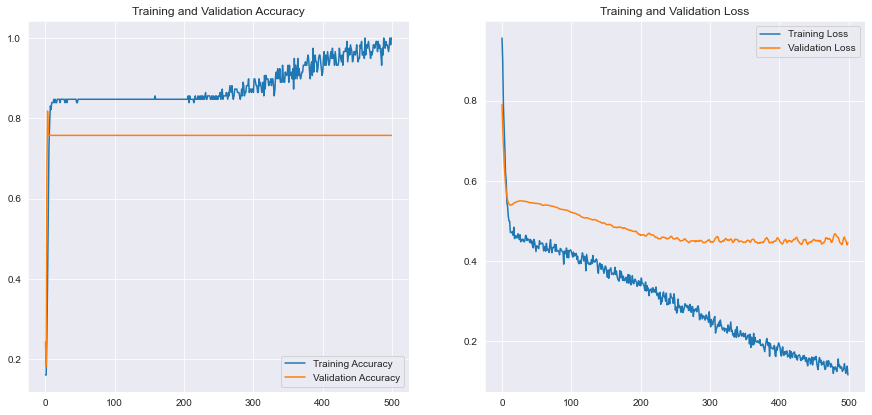

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
predictions = model.predict(x_val)
classes_x=np.argmax(predictions,axis=1)
#predictions = predictions.reshape(1,-1)[0]
#classes_x.shape
#y_val.shape
print(classification_report(y_val, classes_x, target_names = ['Lifestyle (Class 0)','Soccer (Class 1)']))

                     precision    recall  f1-score   support

Lifestyle (Class 0)       0.74      0.92      0.82        25
   Soccer (Class 1)       0.00      0.00      0.00         8

           accuracy                           0.70        33
          macro avg       0.37      0.46      0.41        33
       weighted avg       0.56      0.70      0.62        33



In [63]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [64]:
base_model.trainable = False

In [74]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="softmax")                                     
                                ])

In [75]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [77]:
#X_train = x_train
#Y_train = y_train

#x_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#x_val = np.asarray(y_val).astype('float32').reshape((-1,1))

#history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))
history =  model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

#train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#valid_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))

#history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/500
4/4 [==============================] - 5s 772ms/step - loss: 1.2505 - accuracy: 0.1525 - val_loss: 1.1774 - val_accuracy: 0.2424
Epoch 2/500
4/4 [==============================] - 2s 510ms/step - loss: 1.2502 - accuracy: 0.1525 - val_loss: 1.1699 - val_accuracy: 0.2424
Epoch 3/500
4/4 [==============================] - 2s 491ms/step - loss: 1.1955 - accuracy: 0.1525 - val_loss: 1.1624 - val_accuracy: 0.2424
Epoch 4/500
4/4 [==============================] - 2s 524ms/step - loss: 1.2440 - accuracy: 0.1525 - val_loss: 1.1550 - val_accuracy: 0.2424
Epoch 5/500
4/4 [==============================] - 2s 519ms/step - loss: 1.2693 - accuracy: 0.1525 - val_loss: 1.1476 - val_accuracy: 0.2424
Epoch 6/500
4/4 [==============================] - 2s 548ms/step - loss: 1.2297 - accuracy: 0.1525 - val_loss: 1.1404 - val_accuracy: 0.2424
Epoch 7/500
4/4 [==============================] - 2s 541ms/step - loss: 1.1893 - accuracy: 0.1525 - val_loss: 1.1332 - val_accuracy: 0.2424
Epoch 8/500
4

Epoch 59/500
4/4 [==============================] - 2s 562ms/step - loss: 0.8628 - accuracy: 0.1525 - val_loss: 0.8699 - val_accuracy: 0.2424
Epoch 60/500
4/4 [==============================] - 2s 542ms/step - loss: 0.8573 - accuracy: 0.1525 - val_loss: 0.8666 - val_accuracy: 0.2424
Epoch 61/500
4/4 [==============================] - 2s 557ms/step - loss: 0.8627 - accuracy: 0.1525 - val_loss: 0.8634 - val_accuracy: 0.2424
Epoch 62/500
4/4 [==============================] - 2s 549ms/step - loss: 0.8337 - accuracy: 0.1525 - val_loss: 0.8603 - val_accuracy: 0.2424
Epoch 63/500
4/4 [==============================] - 2s 575ms/step - loss: 0.8644 - accuracy: 0.1525 - val_loss: 0.8572 - val_accuracy: 0.2424
Epoch 64/500
4/4 [==============================] - 2s 545ms/step - loss: 0.8394 - accuracy: 0.1525 - val_loss: 0.8542 - val_accuracy: 0.2424
Epoch 65/500
4/4 [==============================] - 2s 552ms/step - loss: 0.8330 - accuracy: 0.1525 - val_loss: 0.8512 - val_accuracy: 0.2424
Epoch 

4/4 [==============================] - 2s 601ms/step - loss: 0.6927 - accuracy: 0.1525 - val_loss: 0.7498 - val_accuracy: 0.2424
Epoch 117/500
4/4 [==============================] - 2s 566ms/step - loss: 0.6673 - accuracy: 0.1525 - val_loss: 0.7485 - val_accuracy: 0.2424
Epoch 118/500
4/4 [==============================] - 2s 604ms/step - loss: 0.6649 - accuracy: 0.1525 - val_loss: 0.7473 - val_accuracy: 0.2424
Epoch 119/500
4/4 [==============================] - 2s 596ms/step - loss: 0.6411 - accuracy: 0.1525 - val_loss: 0.7460 - val_accuracy: 0.2424
Epoch 120/500
4/4 [==============================] - 2s 594ms/step - loss: 0.6657 - accuracy: 0.1525 - val_loss: 0.7448 - val_accuracy: 0.2424
Epoch 121/500
4/4 [==============================] - 2s 584ms/step - loss: 0.6634 - accuracy: 0.1525 - val_loss: 0.7436 - val_accuracy: 0.2424
Epoch 122/500
4/4 [==============================] - 2s 576ms/step - loss: 0.6518 - accuracy: 0.1525 - val_loss: 0.7424 - val_accuracy: 0.2424
Epoch 123/500

4/4 [==============================] - 2s 526ms/step - loss: 0.5508 - accuracy: 0.1525 - val_loss: 0.6993 - val_accuracy: 0.2424
Epoch 174/500
4/4 [==============================] - 2s 559ms/step - loss: 0.5624 - accuracy: 0.1525 - val_loss: 0.6986 - val_accuracy: 0.2424
Epoch 175/500
4/4 [==============================] - 2s 553ms/step - loss: 0.5638 - accuracy: 0.1525 - val_loss: 0.6980 - val_accuracy: 0.2424
Epoch 176/500
4/4 [==============================] - 2s 533ms/step - loss: 0.5827 - accuracy: 0.1525 - val_loss: 0.6973 - val_accuracy: 0.2424
Epoch 177/500
4/4 [==============================] - 2s 517ms/step - loss: 0.5055 - accuracy: 0.1525 - val_loss: 0.6968 - val_accuracy: 0.2424
Epoch 178/500
4/4 [==============================] - 2s 522ms/step - loss: 0.5343 - accuracy: 0.1525 - val_loss: 0.6962 - val_accuracy: 0.2424
Epoch 179/500
4/4 [==============================] - 2s 557ms/step - loss: 0.5407 - accuracy: 0.1525 - val_loss: 0.6956 - val_accuracy: 0.2424
Epoch 180/500

4/4 [==============================] - 2s 567ms/step - loss: 0.4970 - accuracy: 0.1525 - val_loss: 0.6662 - val_accuracy: 0.2424
Epoch 231/500
4/4 [==============================] - 2s 540ms/step - loss: 0.5142 - accuracy: 0.1525 - val_loss: 0.6656 - val_accuracy: 0.2424
Epoch 232/500
4/4 [==============================] - 2s 530ms/step - loss: 0.4713 - accuracy: 0.1525 - val_loss: 0.6649 - val_accuracy: 0.2424
Epoch 233/500
4/4 [==============================] - 2s 545ms/step - loss: 0.5014 - accuracy: 0.1525 - val_loss: 0.6644 - val_accuracy: 0.2424
Epoch 234/500
4/4 [==============================] - 2s 521ms/step - loss: 0.4843 - accuracy: 0.1525 - val_loss: 0.6639 - val_accuracy: 0.2424
Epoch 235/500
4/4 [==============================] - 2s 574ms/step - loss: 0.4923 - accuracy: 0.1525 - val_loss: 0.6634 - val_accuracy: 0.2424
Epoch 236/500
4/4 [==============================] - 2s 559ms/step - loss: 0.4665 - accuracy: 0.1525 - val_loss: 0.6628 - val_accuracy: 0.2424
Epoch 237/500

4/4 [==============================] - 2s 555ms/step - loss: 0.4562 - accuracy: 0.1525 - val_loss: 0.6361 - val_accuracy: 0.2424
Epoch 288/500
4/4 [==============================] - 2s 544ms/step - loss: 0.4298 - accuracy: 0.1525 - val_loss: 0.6357 - val_accuracy: 0.2424
Epoch 289/500
4/4 [==============================] - 2s 541ms/step - loss: 0.4327 - accuracy: 0.1525 - val_loss: 0.6352 - val_accuracy: 0.2424
Epoch 290/500
4/4 [==============================] - 2s 533ms/step - loss: 0.4833 - accuracy: 0.1525 - val_loss: 0.6347 - val_accuracy: 0.2424
Epoch 291/500
4/4 [==============================] - 2s 572ms/step - loss: 0.4146 - accuracy: 0.1525 - val_loss: 0.6341 - val_accuracy: 0.2424
Epoch 292/500
4/4 [==============================] - 2s 547ms/step - loss: 0.4136 - accuracy: 0.1525 - val_loss: 0.6335 - val_accuracy: 0.2424
Epoch 293/500
4/4 [==============================] - 2s 546ms/step - loss: 0.4301 - accuracy: 0.1525 - val_loss: 0.6329 - val_accuracy: 0.2424
Epoch 294/500

4/4 [==============================] - 2s 522ms/step - loss: 0.3729 - accuracy: 0.1525 - val_loss: 0.6042 - val_accuracy: 0.2424
Epoch 345/500
4/4 [==============================] - 2s 540ms/step - loss: 0.3675 - accuracy: 0.1525 - val_loss: 0.6037 - val_accuracy: 0.2424
Epoch 346/500
4/4 [==============================] - 2s 529ms/step - loss: 0.4018 - accuracy: 0.1525 - val_loss: 0.6031 - val_accuracy: 0.2424
Epoch 347/500
4/4 [==============================] - 2s 541ms/step - loss: 0.3838 - accuracy: 0.1525 - val_loss: 0.6025 - val_accuracy: 0.2424
Epoch 348/500
4/4 [==============================] - 2s 520ms/step - loss: 0.4008 - accuracy: 0.1525 - val_loss: 0.6019 - val_accuracy: 0.2424
Epoch 349/500
4/4 [==============================] - 2s 565ms/step - loss: 0.3814 - accuracy: 0.1525 - val_loss: 0.6014 - val_accuracy: 0.2424
Epoch 350/500
4/4 [==============================] - 2s 547ms/step - loss: 0.3772 - accuracy: 0.1525 - val_loss: 0.6008 - val_accuracy: 0.2424
Epoch 351/500

4/4 [==============================] - 2s 522ms/step - loss: 0.3711 - accuracy: 0.1525 - val_loss: 0.5738 - val_accuracy: 0.2424
Epoch 402/500
4/4 [==============================] - 2s 525ms/step - loss: 0.3520 - accuracy: 0.1525 - val_loss: 0.5732 - val_accuracy: 0.2424
Epoch 403/500
4/4 [==============================] - 2s 513ms/step - loss: 0.3595 - accuracy: 0.1525 - val_loss: 0.5726 - val_accuracy: 0.2424
Epoch 404/500
4/4 [==============================] - 2s 514ms/step - loss: 0.3430 - accuracy: 0.1525 - val_loss: 0.5720 - val_accuracy: 0.2424
Epoch 405/500
4/4 [==============================] - 2s 511ms/step - loss: 0.3499 - accuracy: 0.1525 - val_loss: 0.5715 - val_accuracy: 0.2424
Epoch 406/500
4/4 [==============================] - 2s 531ms/step - loss: 0.3586 - accuracy: 0.1525 - val_loss: 0.5709 - val_accuracy: 0.2424
Epoch 407/500
4/4 [==============================] - 2s 534ms/step - loss: 0.3668 - accuracy: 0.1525 - val_loss: 0.5703 - val_accuracy: 0.2424
Epoch 408/500

4/4 [==============================] - 2s 579ms/step - loss: 0.3333 - accuracy: 0.1525 - val_loss: 0.5423 - val_accuracy: 0.2424
Epoch 459/500
4/4 [==============================] - 2s 583ms/step - loss: 0.3269 - accuracy: 0.1525 - val_loss: 0.5417 - val_accuracy: 0.2424
Epoch 460/500
4/4 [==============================] - 2s 567ms/step - loss: 0.3027 - accuracy: 0.1525 - val_loss: 0.5412 - val_accuracy: 0.2424
Epoch 461/500
4/4 [==============================] - 2s 555ms/step - loss: 0.3003 - accuracy: 0.1525 - val_loss: 0.5407 - val_accuracy: 0.2424
Epoch 462/500
4/4 [==============================] - 2s 550ms/step - loss: 0.3165 - accuracy: 0.1525 - val_loss: 0.5401 - val_accuracy: 0.2424
Epoch 463/500
4/4 [==============================] - 2s 584ms/step - loss: 0.3139 - accuracy: 0.1525 - val_loss: 0.5396 - val_accuracy: 0.2424
Epoch 464/500
4/4 [==============================] - 2s 547ms/step - loss: 0.3206 - accuracy: 0.1525 - val_loss: 0.5391 - val_accuracy: 0.2424
Epoch 465/500

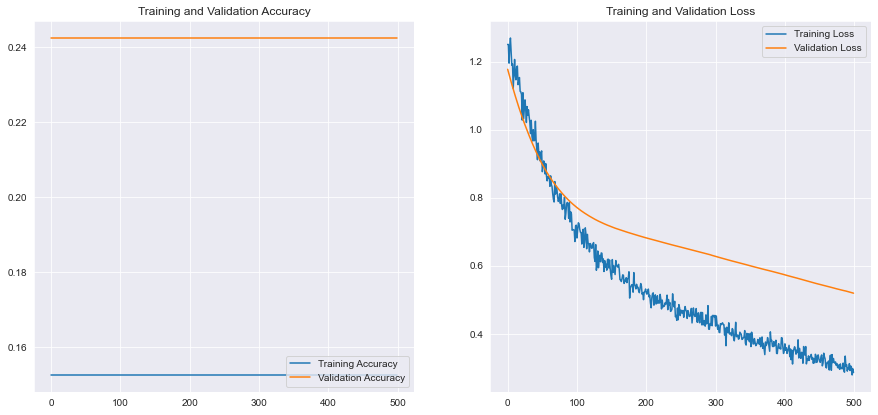

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
predictions = model.predict(x_val)
classes_x=np.argmax(predictions,axis=1)
print(classification_report(y_val, classes_x, target_names = ['Lifestyle (Class 0)','Soccer (Class 1)']))

                     precision    recall  f1-score   support

Lifestyle (Class 0)       0.76      1.00      0.86        25
   Soccer (Class 1)       0.00      0.00      0.00         8

           accuracy                           0.76        33
          macro avg       0.38      0.50      0.43        33
       weighted avg       0.57      0.76      0.65        33



/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [10]:
import pickle

In [84]:
model.save('saved_steps')

INFO:tensorflow:Assets written to: saved_steps/assets


INFO:tensorflow:Assets written to: saved_steps/assets
/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [14]:
data = {"model": classes_x}

NameError: name 'classes_x' is not defined

In [12]:
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(model,file)

AttributeError: Can't pickle local object 'Loader._recreate_base_user_object.<locals>._UserObject'

In [83]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
classifier_loaded = data["model"]

IsADirectoryError: [Errno 21] Is a directory: 'saved_steps.pkl'

In [ ]:
y_pred = classifier_loaded.predict(x_val)
y_pred

In [4]:
import pandas as pd
from deployml.keras import NeuralNetworkBase

ImportError: cannot import name 'NeuralNetworkBase' from 'deployml.keras' (/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/deployml/keras/__init__.py)

In [7]:
from tensorflow import keras
model = keras.models.load_model('/Users/alexandru-robertcroitoru/VSCode/MasterThesis/saved_steps')

2021-09-26 15:18:22.650282: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from keras.models import model_from_json

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


/Users/alexandru-robertcroitoru/opt/miniconda3/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
